In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
import pandas as pd

file_path = "../data_raw/primary.csv"   
datafile = pd.read_csv(file_path)

datafile.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,All genders,Not applicable,Number,6217756.0
1,Afghanistan,2014,Female,Not applicable,Number,2484471.0
2,Afghanistan,2013,Female,Not applicable,Number,2401135.0
3,Afghanistan,2013,All genders,Not applicable,Number,5986268.0
4,Afghanistan,2012,All genders,Not applicable,Number,5767543.0


In [5]:

# Renaming columns as per requirements 
datafile = datafile.rename(columns = {
    "Reference Area" : "Country",
    "Time Period" : "Year",
    "Sex" : "Gender",
    "Observation Value" : "Enrolments"
})

datafile.head()

,Country,Year,Gender,Age group,Units of measurement,Enrolments
0,Afghanistan,2014,All genders,Not applicable,Number,6217756.0
1,Afghanistan,2014,Female,Not applicable,Number,2484471.0
2,Afghanistan,2013,Female,Not applicable,Number,2401135.0
3,Afghanistan,2013,All genders,Not applicable,Number,5986268.0
4,Afghanistan,2012,All genders,Not applicable,Number,5767543.0


In [6]:
print(datafile.columns.tolist())

['Country', 'Year', 'Gender', 'Age group', 'Units of measurement', 'Enrolments']


In [7]:
# Had to rename again to get the 's' idk why

datafile = datafile.rename(columns={
    "Enrolments": "Enrolments"
})

In [8]:
datafile.head()

,Country,Year,Gender,Age group,Units of measurement,Enrolments
0,Afghanistan,2014,All genders,Not applicable,Number,6217756.0
1,Afghanistan,2014,Female,Not applicable,Number,2484471.0
2,Afghanistan,2013,Female,Not applicable,Number,2401135.0
3,Afghanistan,2013,All genders,Not applicable,Number,5986268.0
4,Afghanistan,2012,All genders,Not applicable,Number,5767543.0


In [9]:
# Removing percentage rows form unit of measurement

datafile = datafile[datafile["Units of measurement"]=="Number"]

datafile.head(100)

,Country,Year,Gender,Age group,Units of measurement,Enrolments
0,Afghanistan,2014,All genders,Not applicable,Number,6217756.0
1,Afghanistan,2014,Female,Not applicable,Number,2484471.0
2,Afghanistan,2013,Female,Not applicable,Number,2401135.0
3,Afghanistan,2013,All genders,Not applicable,Number,5986268.0
4,Afghanistan,2012,All genders,Not applicable,Number,5767543.0
...,...,...,...,...,...,...
95,Andorra,2014,All genders,Not applicable,Number,4065.0
96,Andorra,2013,Female,Not applicable,Number,1917.0
97,Andorra,2013,All genders,Not applicable,Number,4068.0
98,Andorra,2012,Female,Not applicable,Number,1942.0


In [10]:
# Dropping useless column called  "Age Group" as it is always Not applicable and the assignment also does not require it 
# We are also removing the Units of Measurement column because now that we removed all the Percentage rows, we know everything on that column is Number

datafile = datafile.drop(columns=["Age group", "Units of measurement"])

datafile.head()

,Country,Year,Gender,Enrolments
0,Afghanistan,2014,All genders,6217756.0
1,Afghanistan,2014,Female,2484471.0
2,Afghanistan,2013,Female,2401135.0
3,Afghanistan,2013,All genders,5986268.0
4,Afghanistan,2012,All genders,5767543.0


In [11]:
# Converting data types for ease of use

datafile["Year"] = datafile["Year"].astype(int)
datafile["Enrolments"] = datafile["Enrolments"].astype(float)

datafile.head()

,Country,Year,Gender,Enrolments
0,Afghanistan,2014,All genders,6217756.0
1,Afghanistan,2014,Female,2484471.0
2,Afghanistan,2013,Female,2401135.0
3,Afghanistan,2013,All genders,5986268.0
4,Afghanistan,2012,All genders,5767543.0


In [12]:
# Checking for missing values

datafile.isnull().sum()

Country       0
Year          0
Gender        0
Enrolments    0
dtype: int64

In [13]:
# Sorting by 3 parameters
# Also, just realised that there is no separate count for males and that is just sad......

datafile = datafile.sort_values(by = ["Country", "Year", "Gender"])

datafile.head(100)

,Country,Year,Gender,Enrolments
28,Afghanistan,2000,All genders,749360.0
29,Afghanistan,2000,Female,0.0
26,Afghanistan,2001,All genders,773623.0
27,Afghanistan,2001,Female,0.0
24,Afghanistan,2002,All genders,2667629.0
...,...,...,...,...
118,Andorra,2002,Female,1948.0
116,Andorra,2003,All genders,4142.0
117,Andorra,2003,Female,1954.0
115,Andorra,2004,All genders,4264.0


In [14]:
# Resetting index

datafile = datafile.reset_index(drop = True)
datafile.index = datafile.index +1 # Because the index started at 0 and I did not like that

datafile.head()

,Country,Year,Gender,Enrolments
1,Afghanistan,2000,All genders,749360.0
2,Afghanistan,2000,Female,0.0
3,Afghanistan,2001,All genders,773623.0
4,Afghanistan,2001,Female,0.0
5,Afghanistan,2002,All genders,2667629.0


In [15]:
# Saving the cleaned data in desired folder

datafile.to_csv("../data_clean/primary_clean.csv", index=True)

In [16]:
# Checking if it really exists

import os
os.path.exists("../data_clean")

True

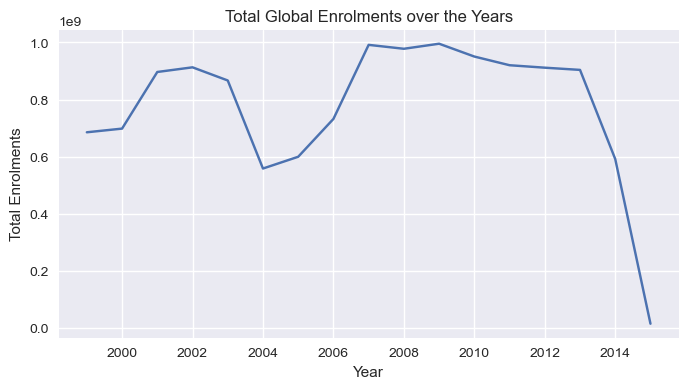

In [18]:
enrolments_years = datafile.groupby("Year")["Enrolments"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=enrolments_years, x = "Year", y = "Enrolments")
plt.title("Total Global Enrolments over the Years")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.show()

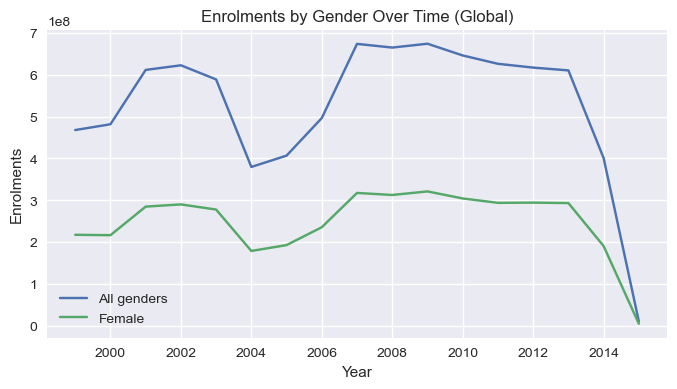

In [19]:
gender_trend = datafile.groupby(["Year", "Gender"])["Enrolments"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=gender_trend, x="Year", y="Enrolments", hue="Gender")
plt.title("Enrolments by Gender Over Time (Global)")
plt.xlabel("Year")
plt.ylabel("Enrolments")
plt.legend()
plt.show()

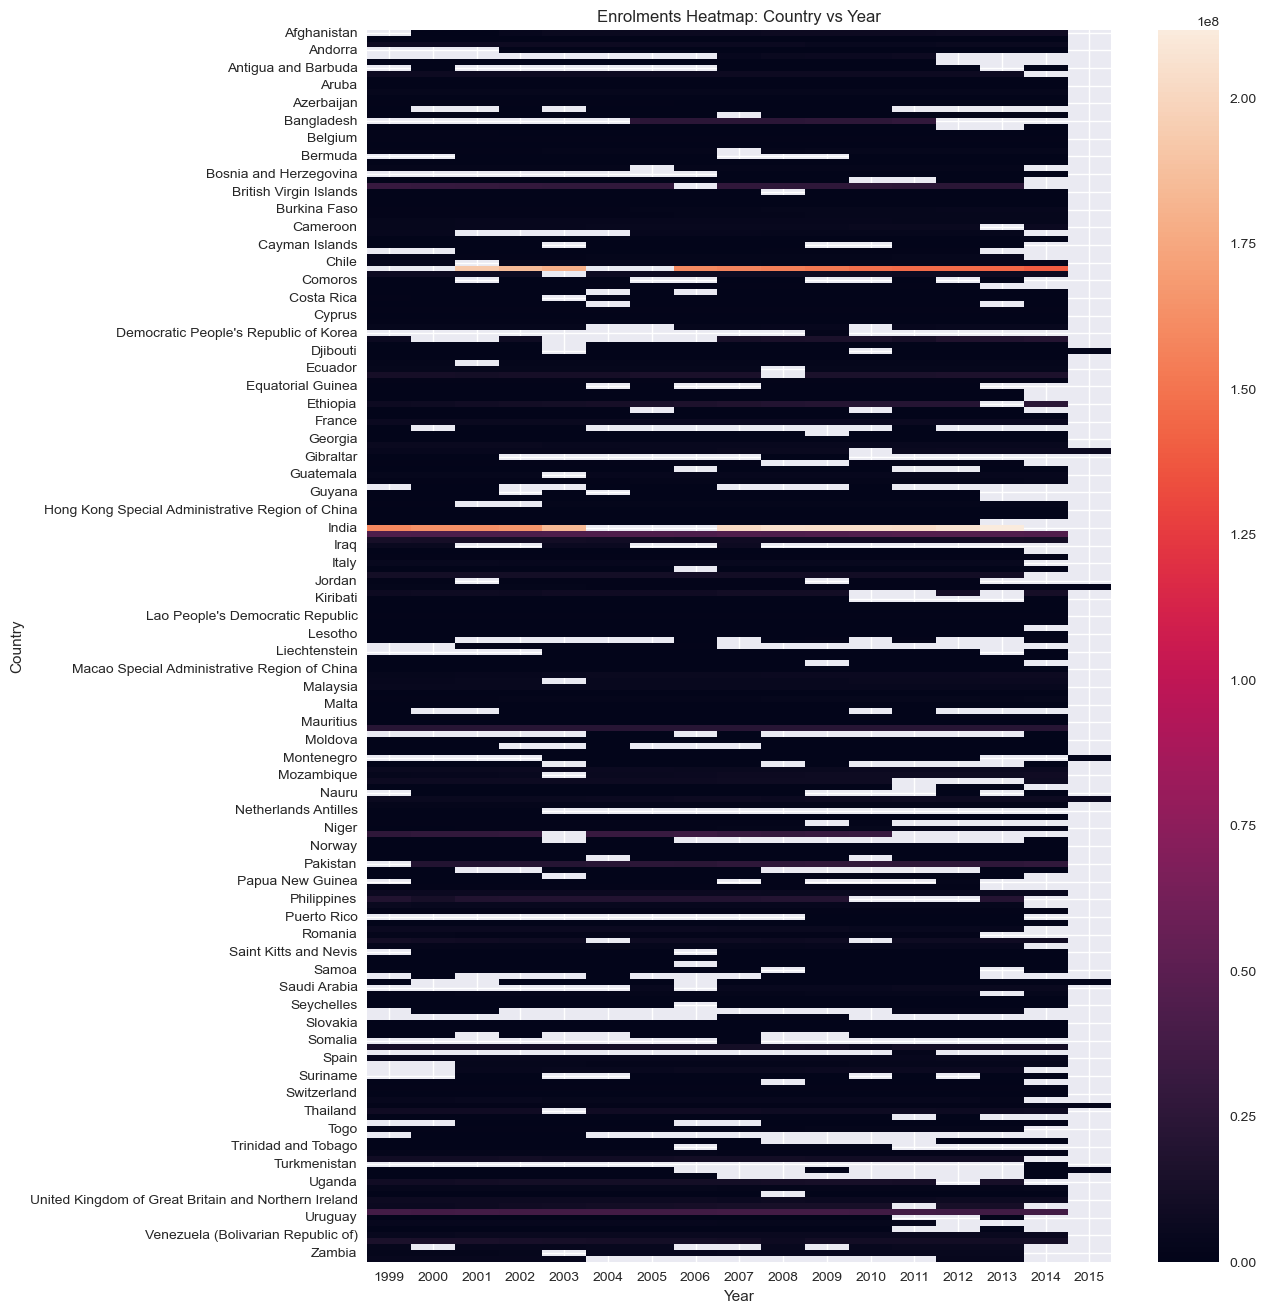

In [24]:
heatmap_data = datafile.pivot_table(
    index="Country",
    columns="Year",
    values="Enrolments",
    aggfunc="sum"
)

plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data)
plt.title("Enrolments Heatmap: Country vs Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()